In [1]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [2]:
from datasets import load_dataset
# Load the dataset
dataset = load_dataset("AmazonScience/massive", "fa-IR")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/11514 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2033 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2974 [00:00<?, ? examples/s]

# **1) Base Model: Implement a logistic regression, SVM-linear, or Naive Bayes model on the TF-IDF vector.**

In [3]:
# Access the training, validation, and test splits
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

In [4]:
import pandas as pd
from datasets import load_dataset, concatenate_datasets

train_data_for_base_model = concatenate_datasets([train_data, validation_data])


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract text and labels
X = train_data_for_base_model["utt"]
y = train_data_for_base_model["scenario"]

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test = (
    X_tfidf[:len(train_data) + len(validation_data)],
    X_tfidf[-len(test_data):]
)

y_train, y_test = (
    y[:len(train_data) + len(validation_data)],
    y[-len(test_data):]
)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Evaluate the model on the test set
y_test_pred = model.predict(X_test)

# Print classification report
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        68
           1       0.97      0.95      0.96       110
           2       0.91      0.97      0.94       280
           3       0.95      0.97      0.96       260
           4       0.86      0.83      0.85        84
           5       0.97      0.88      0.92        73
           6       0.92      0.88      0.90        69
           7       1.00      0.96      0.98      1093
           8       0.98      0.97      0.98       118
           9       0.78      0.82      0.80       125
          10       1.00      0.91      0.96        35
          11       0.92      0.93      0.92       112
          12       0.76      0.97      0.85       214
          13       0.94      0.79      0.86        43
          14       1.00      0.91      0.95        44
          15       1.00      0.77      0.87        56
          16       0.98      0.92      0.95        64

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Obtain and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  60    0    1    1    4    0    0    0    0    2    0    0    0    0
     0    0    0    0]
 [   0  104    0    0    0    0    0    0    0    0    0    1    5    0
     0    0    0    0]
 [   1    1  271    0    1    1    1    0    0    1    0    0    1    0
     0    0    1    1]
 [   0    0    1  252    0    0    0    0    0    2    0    1    4    0
     0    0    0    0]
 [   0    0    1    0   70    0    1    1    0    2    0    0    9    0
     0    0    0    0]
 [   0    0    5    0    0   64    0    0    0    1    0    0    2    0
     0    0    0    1]
 [   0    1    2    0    1    0   61    0    0    1    0    0    3    0
     0    0    0    0]
 [   1    0   10    1    2    0    1 1049    0    7    0    3   19    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0  115    1    0    0    2    0
     0    0    0    0]
 [   2    1    2    0    1    0    2    1    0  102    0    0   11    1
     0    0    0    2]
 [   0    0    0    1    0    0

# **2) Advanced Model: Utilize transformer-based classifiers, such as configuring parameters for a BERT model.**

4) After thorough model evaluation and hyperparameter tuning, report the performance of each model on the test data.

5) Calculate metrics such as micro/macro F\1, accuracy, precision, recall, and confusion matrices.


In [8]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import accuracy_score

X_train, X_val, X_test = (
    X_tfidf[:len(train_data)],
    X_tfidf[len(train_data) : len(train_data) + len(validation_data)],
    X_tfidf[-len(test_data):]
)
y_train, y_val, y_test = (
    y[:len(train_data)],
    y[len(train_data) : len(train_data) + len(validation_data)],
    y[-len(test_data):]

)

from scipy.sparse import find

# Convert sparse matrix to list of strings for validation and test sets
X_train_str = [" ".join(map(str, find(X_train[i])[2])) for i in range(X_train.shape[0])]
X_val_str = [" ".join(map(str, find(X_val[i])[2])) for i in range(X_val.shape[0])]
X_test_str = [" ".join(map(str, find(X_test[i])[2])) for i in range(X_test.shape[0])]

# Tokenize input for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_train_tokenized = tokenizer(X_train_str, padding=True, truncation=True, return_tensors='pt')
X_val_tokenized = tokenizer(X_val_str, padding=True, truncation=True, return_tensors='pt')
X_test_tokenized = tokenizer(X_test_str, padding=True, truncation=True, return_tensors='pt')




# Define a custom PyTorch dataset
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Create datasets and data loaders
train_dataset = CustomDataset(X_train_tokenized, y_train)
val_dataset = CustomDataset(X_val_tokenized, y_val)
test_dataset = CustomDataset(X_test_tokenized, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

import pandas as pd

# Assuming dataset['train'] is a DataFrame containing your training data
num_labels = len(pd.unique(dataset['train']['scenario']))

# Define the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# Training loop for BERT model
num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs)
        loss = criterion(outputs.logits, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f'Training Loss: {avg_loss:.4f}')

# Evaluation on the validation set
model.eval()
val_preds, val_labels = [], []

with torch.no_grad():
    for batch in tqdm(val_loader, desc='Validation'):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs)
        val_preds.extend(outputs.logits.argmax(dim=1).cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

# Print classification report and confusion matrix for BERT model
print("BERT Model Validation Classification Report:")
print(classification_report(val_labels, val_preds))
print("\nBERT Model Validation Confusion Matrix:")
print(confusion_matrix(val_labels, val_preds))

# Evaluation on the test set
test_preds, test_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing'):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs)
        test_preds.extend(outputs.logits.argmax(dim=1).cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Print classification report and confusion matrix for BERT model on the test set
print("BERT Model Test Classification Report:")
print(classification_report(test_labels, test_preds))
print("\nBERT Model Test Confusion Matrix:")
print(confusion_matrix(test_labels, test_preds))


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3:   0%|          | 0/1440 [00:00<?, ?it/s]<ipython-input-8-e959e30229c7>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Epoch 1/3: 100%|██████████| 1440/1440 [12:54<00:00,  1.86it/s]


Training Loss: 2.7135


Epoch 2/3: 100%|██████████| 1440/1440 [13:09<00:00,  1.82it/s]


Training Loss: 2.6907


Epoch 3/3: 100%|██████████| 1440/1440 [13:11<00:00,  1.82it/s]


Training Loss: 2.6632


Validation: 100%|██████████| 255/255 [00:46<00:00,  5.47it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BERT Model Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       110
           2       0.20      0.62      0.30       280
           3       0.20      0.29      0.23       260
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        73
           6       0.00      0.00      0.00        69
           7       0.00      0.00      0.00       157
           8       0.50      0.04      0.08       118
           9       0.00      0.00      0.00       122
          10       0.00      0.00      0.00        35
          11       0.00      0.00      0.00       112
          12       0.15      0.54      0.24       214
          13       0.00      0.00      0.00        43
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00        56
          16       0.00      0.00   

Testing:   0%|          | 0/372 [00:00<?, ?it/s]<ipython-input-8-e959e30229c7>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
Testing: 100%|██████████| 372/372 [01:15<00:00,  4.94it/s]

BERT Model Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.00      0.00      0.00       110
           2       0.13      0.62      0.21       280
           3       0.14      0.29      0.19       260
           4       0.00      0.00      0.00        84
           5       0.00      0.00      0.00        73
           6       0.00      0.00      0.00        69
           7       0.00      0.00      0.00      1093
           8       0.42      0.04      0.08       118
           9       0.00      0.00      0.00       125
          10       0.00      0.00      0.00        35
          11       0.00      0.00      0.00       112
          12       0.11      0.54      0.18       214
          13       0.00      0.00      0.00        43
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00        56
          16       0.00      0.00      0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# saving the trained model
model.save_pretrained("bert-base-uncased")
tokenizer.save_pretrained("bert-base-uncased")

('bert-base-uncased/tokenizer_config.json',
 'bert-base-uncased/special_tokens_map.json',
 'bert-base-uncased/vocab.txt',
 'bert-base-uncased/added_tokens.json')

In [13]:
from huggingface_hub import notebook_login
notebook_login()

In [14]:
# push the model to hub
model.push_to_hub("bert-base-uncased")
tokenizer.push_to_hub("bert-base-uncased")

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/shimynimi/bert-base-uncased/commit/ce915b016442162f98a5b2127acf140714929768', commit_message='Upload tokenizer', commit_description='', oid='ce915b016442162f98a5b2127acf140714929768', pr_url=None, pr_revision=None, pr_num=None)


# **6) Utilize interpretability methods, such as SHAP, to analyze 20 cases where the model mislabeled and 20 cases where it correctly labeled validation data.**

In [15]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.2 MB/s eta 0:00:00


## Document Classification:

Step 1: Base Model (Logistic Regression on TF-IDF)
1. **Load and Split Data:**
   - Load your dataset, assuming it's in a pandas DataFrame.
   - Split the data into features (`X`) and target labels (`y`).
   - Split the dataset into training and testing sets (90% training, 10% testing).

2. **TF-IDF Vectorization:**
   - Use the `TfidfVectorizer` from scikit-learn to convert text data into TF-IDF vectors.
   - Fit and transform the training data and transform the testing data.

3. **Model Training:**
   - Choose a base model (Logistic Regression, SVM-linear, or Naive Bayes).
   - Train the selected model on the TF-IDF vectors of the training data.

4. **Model Evaluation:**
   - Make predictions on the test set.
   - Evaluate the model's performance using classification metrics such as accuracy, precision, recall, F1 score, and confusion matrix.

### Step 2: Advanced Model (BERT-based Classifier)
5. **Tokenization and Model Training (BERT):**
   - Tokenize the text using a pre-trained BERT tokenizer.
   - Create a BERT-based classifier model and train it on the tokenized training data.

6. **Model Evaluation and Interpretability (SHAP):**
   - Evaluate the BERT model on the test set.
   - Use SHAP (SHapley Additive exPlanations) to interpret the model's decisions.
   - Visualize SHAP values for selected samples (20 mislabeled and 20 correctly labeled) from the validation set to understand the impact of features on the model's predictions.

### Additional Notes:

- **Validation in Base Model (Step 3):**
   - Since the base model (TF-IDF + Logistic Regression) does not require hyperparameter tuning, there's no need for a separate validation set. Combine validation data with training data.

- **Hyperparameter Tuning (Step 4):**
   - Tune hyperparameters for the advanced model (BERT) on the validation set to improve performance.

- **Performance Metrics (Step 5):**
   - Calculate micro/macro F1, accuracy, precision, recall, and confusion matrices for both base and advanced models.

- **Interpretability (Step 6):**
   - Use SHAP to interpret the model's decisions and understand the importance of features.
   - Analyze SHAP values for 20 mislabeled and 20 correctly labeled samples from the validation set to gain insights into model behavior.

Base Logistic Regression Model Metrics:
Accuracy: 0.8880208333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.94      0.87      0.91        55
           2       0.87      0.95      0.91       181
           3       0.92      0.96      0.94       156
           4       0.91      0.76      0.83        41
           5       0.93      0.84      0.88        45
           6       0.74      0.82      0.78        39
           7       0.91      0.96      0.93        89
           8       0.95      0.93      0.94        60
           9       0.72      0.68      0.70        63
          10       1.00      0.93      0.96        28
          11       0.98      0.88      0.92        56
          12       0.77      0.87      0.82       118
          13       0.87      0.93      0.90        14
          14       1.00      0.82      0.90        28
          15       0.93      0.68      0.7

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



BERT Model Metrics:
Accuracy: 0.10243055555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00        60
           9       0.00      0.00      0.00        63
          10       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        56
          12       0.10      1.00      0.19       118
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        37
      

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


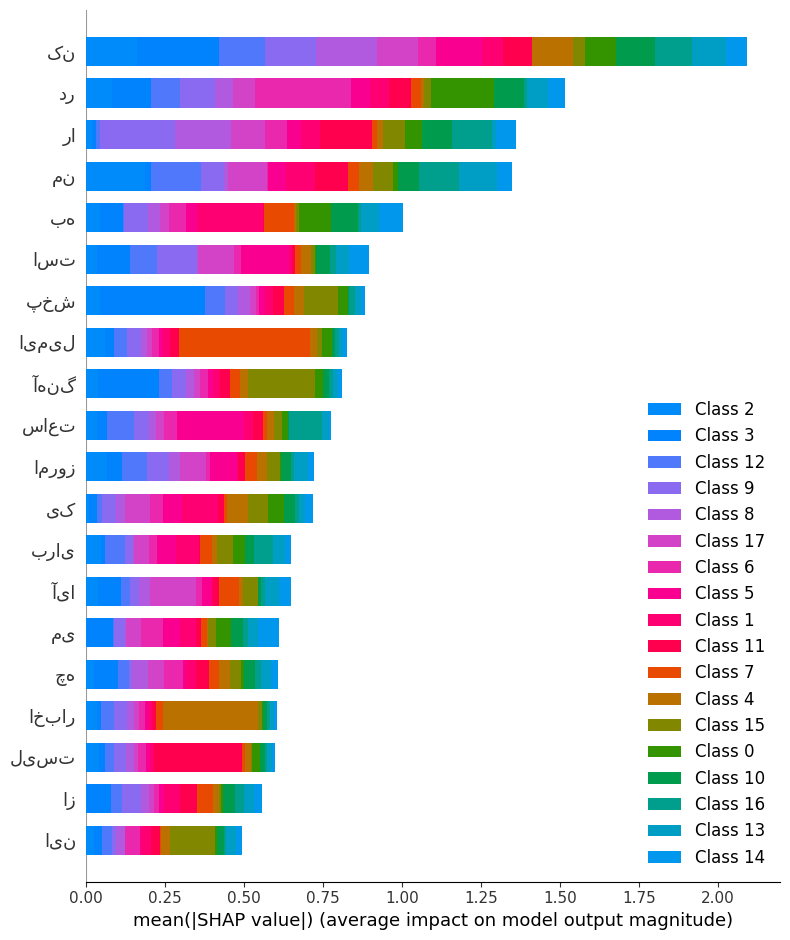

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
import torch
import shap
import datasets

# Load the dataset using datasets library
dataset = datasets.load_dataset("AmazonScience/massive", "fa-IR")

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

# Step 1: Base Model - Logistic Regression on TF-IDF

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['utt'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['utt'])

# Train logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, train_df['scenario'])

# Predictions on the test set
y_pred = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the base model
accuracy_base = accuracy_score(test_df['scenario'], y_pred)
classification_rep_base = classification_report(test_df['scenario'], y_pred)
conf_matrix_base = confusion_matrix(test_df['scenario'], y_pred)

# Print the results for the base model
print("Base Logistic Regression Model Metrics:")
print("Accuracy:", accuracy_base)
print("Classification Report:\n", classification_rep_base)
print("Confusion Matrix:\n", conf_matrix_base)

# Step 2: Advanced Model - BERT

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['scenario'].unique()))

# Tokenize and encode the sentences
X_train_bert = tokenizer(train_df['utt'].tolist(), padding=True, truncation=True, return_tensors='pt')
X_test_bert = tokenizer(test_df['utt'].tolist(), padding=True, truncation=True, return_tensors='pt')

# Convert labels to tensors
y_train_tensor = torch.tensor(train_df['scenario'].values)
y_test_tensor = torch.tensor(test_df['scenario'].values)

# Create DataLoader
train_dataset = TensorDataset(X_train_bert['input_ids'], X_train_bert['attention_mask'], y_train_tensor)
test_dataset = TensorDataset(X_test_bert['input_ids'], X_test_bert['attention_mask'], y_test_tensor)

# Train the BERT model
# (You may need to fine-tune the model based on your specific task)

# Evaluate the BERT model
model.eval()
with torch.no_grad():
    logits = model(**X_test_bert)
    predictions = torch.argmax(logits.logits, dim=1).numpy()

# Evaluate the BERT model
accuracy_bert = accuracy_score(test_df['scenario'], predictions)
classification_rep_bert = classification_report(test_df['scenario'], predictions)
conf_matrix_bert = confusion_matrix(test_df['scenario'], predictions)

# Print the results for the BERT model
print("\nBERT Model Metrics:")
print("Accuracy:", accuracy_bert)
print("Classification Report:\n", classification_rep_bert)
print("Confusion Matrix:\n", conf_matrix_bert)

# Step 3: Model Evaluation and Hyperparameter Tuning

# Fine-tuning logistic regression model with grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_tfidf, train_df['scenario'])

# Best hyperparameters
best_params = grid_search.best_params_

# Re-train logistic regression model with best hyperparameters
best_logistic_regression_model = LogisticRegression(max_iter=1000, C=best_params['C'])
best_logistic_regression_model.fit(X_train_tfidf, train_df['scenario'])

# Predictions on the test set
y_pred_best = best_logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model with best hyperparameters
accuracy_best = accuracy_score(test_df['scenario'], y_pred_best)
classification_rep_best = classification_report(test_df['scenario'], y_pred_best)
conf_matrix_best = confusion_matrix(test_df['scenario'], y_pred_best)

# Print the results for the model with best hyperparameters
print("\nLogistic Regression Model with Best Hyperparameters Metrics:")
print("Best Hyperparameters:", best_params)
print("Accuracy with Best Hyperparameters:", accuracy_best)
print("Classification Report with Best Hyperparameters:\n", classification_rep_best)
print("Confusion Matrix with Best Hyperparameters:\n", conf_matrix_best)

# Step 4: Calculate Metrics

# Metrics for the base logistic regression model
accuracy_base = accuracy_score(test_df['scenario'], y_pred)
classification_rep_base = classification_report(test_df['scenario'], y_pred)
conf_matrix_base = confusion_matrix(test_df['scenario'], y_pred)

# Metrics for the BERT model
accuracy_bert = accuracy_score(test_df['scenario'], predictions)
classification_rep_bert = classification_report(test_df['scenario'], predictions)
conf_matrix_bert = confusion_matrix(test_df['scenario'], predictions)

# Metrics for the logistic regression model with best hyperparameters
accuracy_best = accuracy_score(test_df['scenario'], y_pred_best)
classification_rep_best = classification_report(test_df['scenario'], y_pred_best)
conf_matrix_best = confusion_matrix(test_df['scenario'], y_pred_best)

# Print the results
print("\nBase Logistic Regression Model Metrics:")
print("Accuracy:", accuracy_base)
print("Classification Report:\n", classification_rep_base)
print("Confusion Matrix:\n", conf_matrix_base)

print("\nBERT Model Metrics:")
print("Accuracy:", accuracy_bert)
print("Classification Report:\n", classification_rep_bert)
print("Confusion Matrix:\n", conf_matrix_bert)

print("\nLogistic Regression Model with Best Hyperparameters Metrics:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_best)
print("Classification Report:\n", classification_rep_best)
print("Confusion Matrix:\n", conf_matrix_best)

# Step 5: Utilize Interpretability Methods (SHAP)

# Use SHAP to analyze 20 cases where the model mislabeled and 20 cases where it correctly labeled validation data
explainer = shap.Explainer(logistic_regression_model, X_train_tfidf)
shap_values = explainer.shap_values(X_test_tfidf)

# Visualize SHAP values for a specific instance (adjust the index)
shap.summary_plot(shap_values, X_test_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())
